In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
fn = "../input/wikipedia_edits.csv.zip"
df = pd.read_csv(fn)

In [3]:
len(df)

789343

In [4]:
df.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied
0,50_Cent,858765697,858858564,2018-09-10T02:52:25Z,ProspectIV,33893830.0,132452,50 Cent,2006,8,United States,Musician,0
1,50_Cent,858673799,858765697,2018-09-09T13:11:00Z,ProspectIV,33893830.0,132476,50 Cent,2006,8,United States,Musician,0
2,50_Cent,858673121,858673799,2018-09-08T21:46:42Z,ProspectIV,33893830.0,132444,50 Cent,2006,8,United States,Musician,0
3,50_Cent,858673016,858673121,2018-09-08T21:39:37Z,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0
4,50_Cent,858469414,858673016,2018-09-08T21:38:24Z,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0


In [5]:
# Visualize trends over time df wi timeseries charts
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [6]:
df.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied
0,50_Cent,858765697,858858564,2018-09-10 02:52:25+00:00,ProspectIV,33893830.0,132452,50 Cent,2006,8,United States,Musician,0
1,50_Cent,858673799,858765697,2018-09-09 13:11:00+00:00,ProspectIV,33893830.0,132476,50 Cent,2006,8,United States,Musician,0
2,50_Cent,858673121,858673799,2018-09-08 21:46:42+00:00,ProspectIV,33893830.0,132444,50 Cent,2006,8,United States,Musician,0
3,50_Cent,858673016,858673121,2018-09-08 21:39:37+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0
4,50_Cent,858469414,858673016,2018-09-08 21:38:24+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0


In [7]:
# get date only from datetime
df["date"] = df["timestamp"].dt.date
df.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied,date
0,50_Cent,858765697,858858564,2018-09-10 02:52:25+00:00,ProspectIV,33893830.0,132452,50 Cent,2006,8,United States,Musician,0,2018-09-10
1,50_Cent,858673799,858765697,2018-09-09 13:11:00+00:00,ProspectIV,33893830.0,132476,50 Cent,2006,8,United States,Musician,0,2018-09-09
2,50_Cent,858673121,858673799,2018-09-08 21:46:42+00:00,ProspectIV,33893830.0,132444,50 Cent,2006,8,United States,Musician,0,2018-09-08
3,50_Cent,858673016,858673121,2018-09-08 21:39:37+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0,2018-09-08
4,50_Cent,858469414,858673016,2018-09-08 21:38:24+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0,2018-09-08


In [8]:
title = "Manny_Pacquiao"
df_sub = df[df["title"]==title]

In [9]:
len(df_sub)

8917

In [10]:
date_min = df_sub["date"].min()

In [11]:
date_max = df_sub["date"].max()

In [12]:
date_min, date_max

(datetime.date(2004, 8, 20), datetime.date(2018, 9, 10))

In [13]:
'date range" {:%m/%d%Y} to  {:%m/%d%Y}'.format(date_min, date_max)

'date range" 08/202004 to  09/102018'

In [14]:
df_daily = df_sub.groupby("date")["revid"].agg([len])

In [15]:
df_daily.head()

,len
date,
2004-08-20,5
2004-09-06,4
2004-09-12,1
2004-10-14,1
2004-10-22,1


In [16]:
x = df_daily.index

In [17]:
y = df_daily["len"]

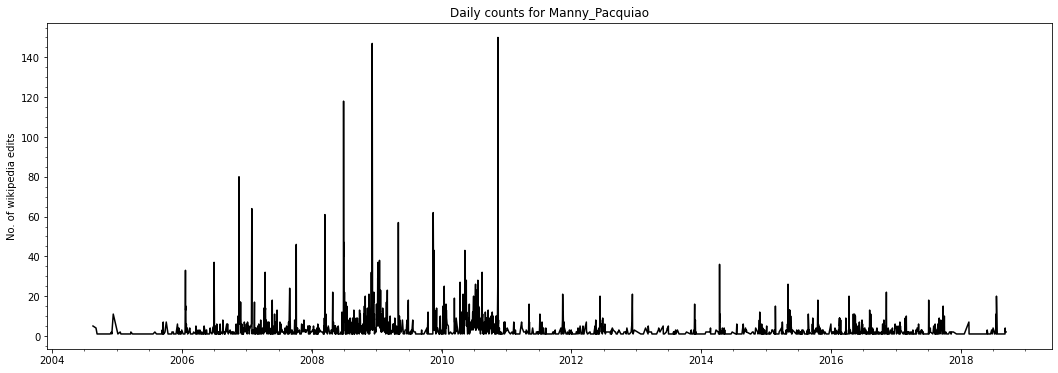

In [18]:
plt.figure(figsize=(18,6))
plt.plot(x,y, color="black")
plt.ylabel("No. of wikipedia edits")
plt.title("Daily counts for %s" % title)
plt.minorticks_on()

In [19]:
# Compare timeseries charts for manny pacquiao and floyd mayweather

df_MP = df[df["title"] == "Manny Pacquiao"]
df_FM = df[df["title"] == "Floyd_Mayweather_Jr."]

In [32]:
df_daily_MP = df_MP.groupby("date")["revid"].agg([len])
df_daily_MP

,len
date,


In [31]:
df_daily_FM = df_FM.groupby("date")["revid"].agg([len])
df_daily_FM

,len
date,
2005-01-12,2
2005-01-19,2
2005-03-24,3
2005-03-25,1
2005-04-14,1
...,...
2018-09-03,3
2018-09-06,2
2018-09-07,5


In [22]:
x_MP = df_daily_MP.index
x_FM = df_daily_FM.index


In [23]:
x_FM

Index([2005-01-12, 2005-01-19, 2005-03-24, 2005-03-25, 2005-04-14, 2005-06-08,
       2005-06-26, 2005-06-29, 2005-07-01, 2005-07-02,
       ...
       2018-07-17, 2018-07-24, 2018-07-28, 2018-08-11, 2018-08-30, 2018-09-03,
       2018-09-06, 2018-09-07, 2018-09-08, 2018-09-09],
      dtype='object', name='date', length=1754)

In [24]:
y_MP = df_daily_MP["len"]
y_FM = df_daily_FM["len"]

In [25]:
y_MP

Series([], Name: len, dtype: float64)

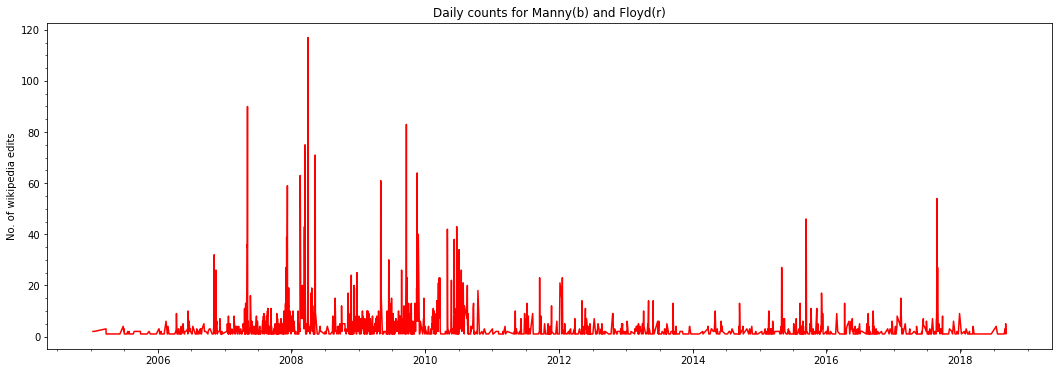

In [26]:
# charts
plt.figure(figsize=(18,6))
plt.plot(x_MP, y_MP, color='black')
plt.plot(x_FM, y_FM, color='red')
plt.ylabel("No. of wikipedia edits")
plt.title("Daily counts for Manny(b) and Floyd(r)")
plt.minorticks_on()

In [27]:
date_start = pd.to_datetime("2015/01/01")
date_end = pd.to_datetime("2015/12/31")

(735599.0, 735963.0)

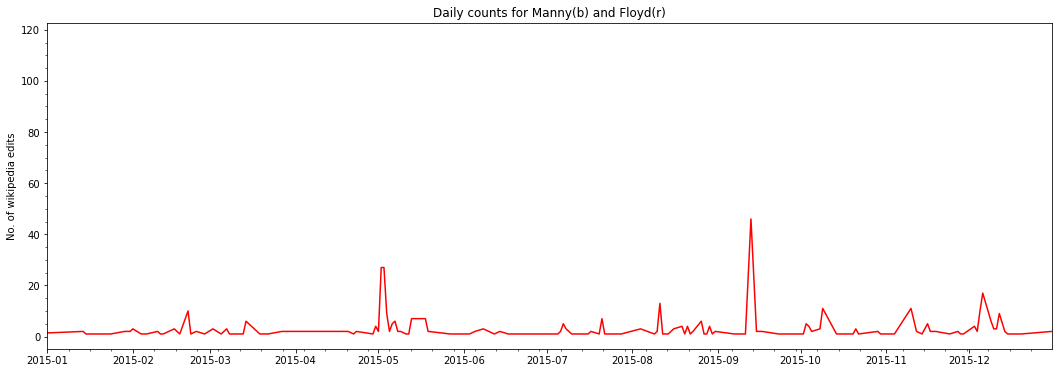

In [28]:
plt.figure(figsize=(18,6))
plt.plot(x_MP, y_MP, 'k-')
plt.plot(x_FM, y_FM, 'r-')
plt.ylabel("No. of wikipedia edits")
plt.title("Daily counts for Manny(b) and Floyd(r)")
plt.minorticks_on()
plt.xlim((date_start,date_end))

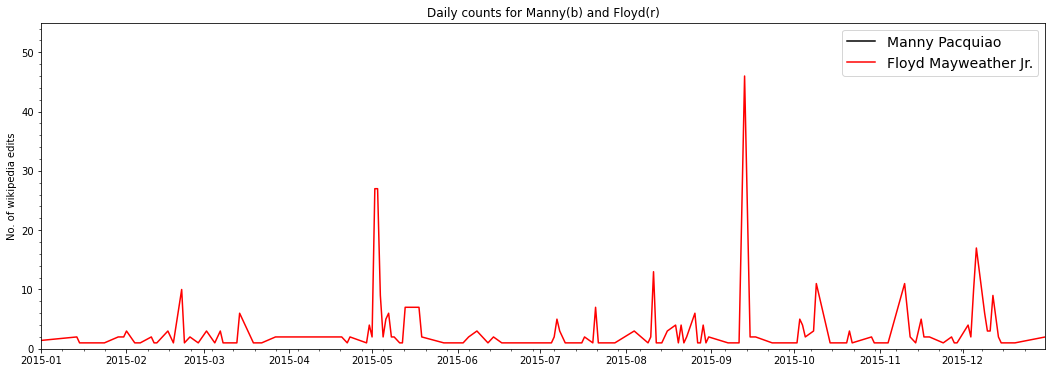

In [34]:
# Add Legend
plt.figure(figsize=(18,6))
plt.plot(x_MP, y_MP, 'k-', label="Manny Pacquiao")
plt.plot(x_FM, y_FM, 'r-', label="Floyd Mayweather Jr.")
plt.ylabel("No. of wikipedia edits")
plt.title("Daily counts for Manny(b) and Floyd(r)")
plt.minorticks_on()
plt.xlim((date_start,date_end))
plt.ylim((0,55))
plt.legend(fontsize=14)

In [37]:
# Annotate Date of "Fight of the Century"

# Define reference date

date_ref = pd.to_datetime("2015/05/02")

In [39]:
#Define annotation label
label_ref = "The Fight of the Century"

In [41]:
# Define x-axis position - convert date to numerical equivalent in matplotlib
date_num_ref = matplotlib.dates.date2num(date_ref)

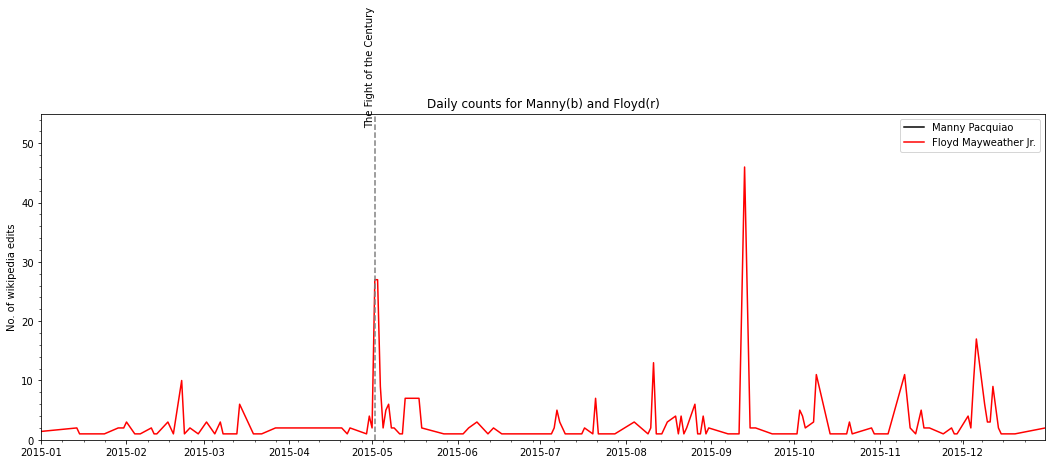

In [43]:
# Add vertical line to show reference date and add label next to it

# Add Legend
plt.figure(figsize=(18,6))
plt.plot(x_MP, y_MP, 'k-', label="Manny Pacquiao")
plt.plot(x_FM, y_FM, 'r-', label="Floyd Mayweather Jr.")
plt.ylabel("No. of wikipedia edits")
plt.title("Daily counts for Manny(b) and Floyd(r)")
plt.minorticks_on()
plt.xlim((date_start,date_end))
plt.ylim((0,55))
plt.legend()
plt.axvline(date_ref, color="gray", ls="--") # add vertical line
plt.text(date_num_ref, 53, label_ref, rotation=90, horizontalalignment="right") # add text label
plt.savefig("../fig/fig_timeseries_Pacquiao_Mayweather.png", dpi=200, box_inches="tight")